In [21]:
#@title Select the date you want to see answers for

date = '2024-07-09'  #@param {type: "date"}

In [31]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(requests.get("http://resbaz.auckland-cer.cloud.edu.au/").json())
df

,timestamp,participant_name,question,answer,is_correct
0,2024-06-26 00:02:17.639261,nick,1,2,True
1,2024-06-26 00:02:20.701660,nick,1,42,False
2,2024-06-26 00:04:38.617547,nick,1,42,False
3,2024-06-26 00:04:55.129664,nick,1,42,False
4,2024-07-03 04:40:35.483340,Victor Gambarini,1,56,False
5,2024-07-03 04:40:47.923353,Victor Gambarini,1,"""👎""",False
6,2024-07-03 04:40:59.159545,Victor Gambarini,1,2,True
7,2024-07-03 04:41:05.206834,Victor Gambarini,1,👍,False
8,2024-07-03 04:41:15.410643,Victor Gambarini,1,2,True
9,2024-07-03 04:41:26.491977,Victor Gambarini,1,2,True


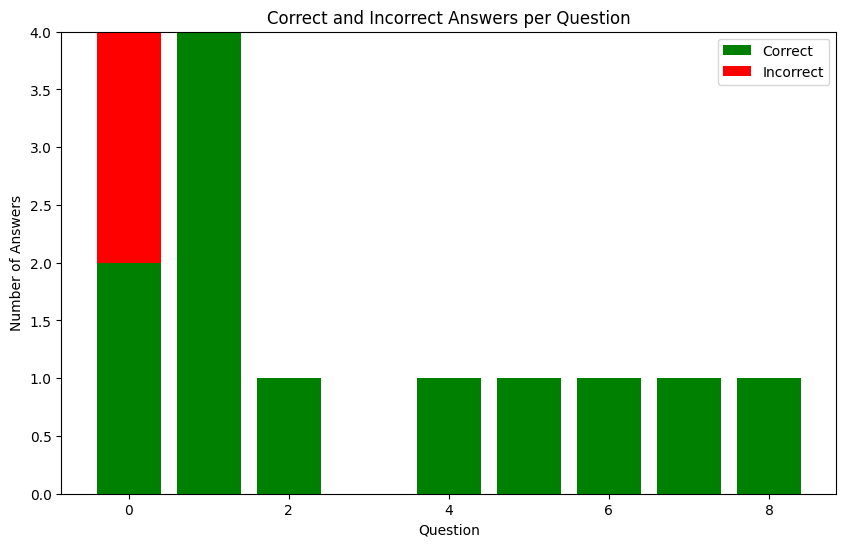

In [34]:
df = df.sort_values(["is_correct", "timestamp"], ascending=False).drop_duplicates(["participant_name", "question"])
# Group by question and count the total and correct answers
grouped = df.groupby('question').agg(total=('is_correct', 'size'), correct=('is_correct', 'sum')).reset_index()

# Calculate incorrect answers
grouped['incorrect'] = grouped['total'] - grouped['correct']

# Remove questions greater than 1000 as those are used for other purposes
grouped = grouped[grouped['question'] <= 1000]

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped['question'], grouped['correct'], color='green', label='Correct')
plt.bar(grouped['question'], grouped['incorrect'], bottom=grouped['correct'], color='red', label='Incorrect')

plt.xlabel('Question')
plt.ylabel('Number of Answers')
plt.title('Correct and Incorrect Answers per Question')
plt.legend()
plt.show()

In [35]:
df_correct = df[df.is_correct].drop_duplicates(["participant_name", "question"])
# Remove questions greater than 1000 as those are used for other purposes
df_correct = df_correct[df_correct['question'] <= 1000]
df_correct

,timestamp,participant_name,question,answer,is_correct
50,2024-07-09 04:18:00.214585,Ben test,0,10,True
49,2024-07-09 03:04:11.610861,Nick Young,8,# @title Check Answer\nimport requests\ndef te...,True
43,2024-07-09 02:51:29.777232,Nick Young,1,2,True
37,2024-07-09 02:19:32.868011,Nick Young,7,"[""banana"", ""apple"", ""orange""]",True
35,2024-07-09 02:12:01.722969,Nick Young,6,int,True
33,2024-07-09 02:10:26.271896,Nick Young,5,string,True
30,2024-07-09 02:03:29.084443,Nick Young,4,6,True
29,2024-07-09 01:38:01.505411,Nick Young,0,10,True
18,2024-07-04 02:17:23.075356,Victor Gambarini,1,2,True
13,2024-07-03 22:54:50.417203,Ben,2,1.4142135623730951,True


<Axes: title={'center': 'correct answers per participant'}, xlabel='participant_name'>

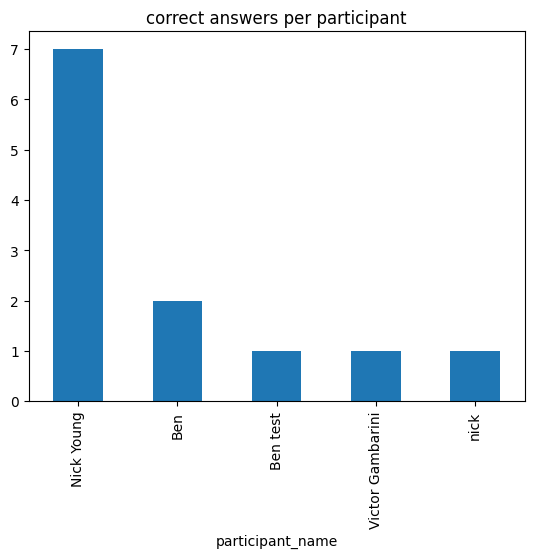

In [36]:
df_correct.participant_name.value_counts().plot.bar(title="correct answers per participant")

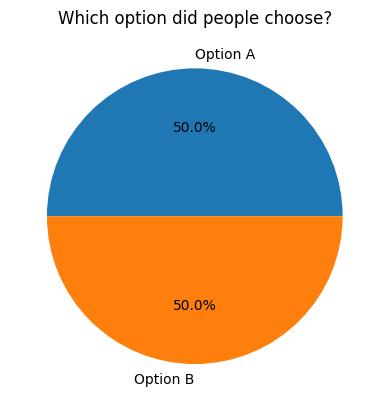

In [40]:
import matplotlib.pyplot as plt

# Get the data for question 1500
question_1500 = df[df.question == 1500]

# Count the number of participants who selected option a or b
option_a_count = question_1500[question_1500.answer == "Option A the Math Problem"].participant_name.nunique()
option_b_count = question_1500[question_1500.answer == "Option B the Waiter and Tips"].participant_name.nunique()

# Create the pizza plot
fig, ax = plt.subplots()
ax.pie([option_a_count, option_b_count], labels=["Option A", "Option B"], autopct="%1.1f%%")

# Add title and show the plot
ax.set_title("Which option did people choose?")
plt.show()
